In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with= engine)


In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [26]:
# Create our session (link) from Python to the DB
session =  Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
most_recent =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
most_recent

('2017-08-23',)

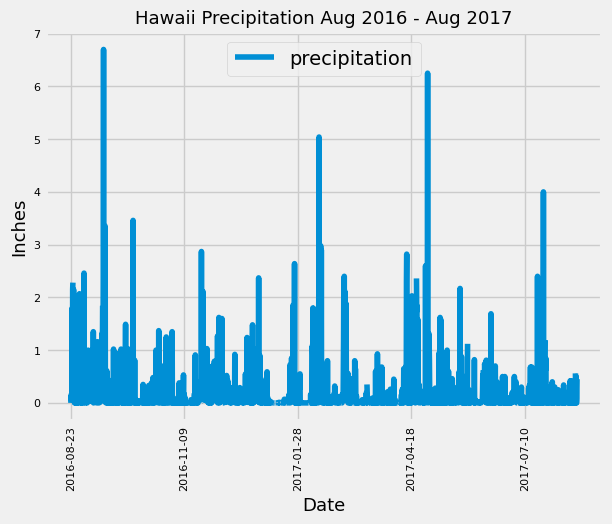

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

year= dt.date(2017, 8, 23)-dt.timedelta(days=365)


# Calculate the date one year from the last date in data set.
prev_date = dt.date(year.year, year.month, year.day)

# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data =pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
data.set_index(data['date'], inplace =True)

# Use Pandas Plotting with Matplotlib to plot the data
data.plot('date', 'precipitation')


plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 13)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 13)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

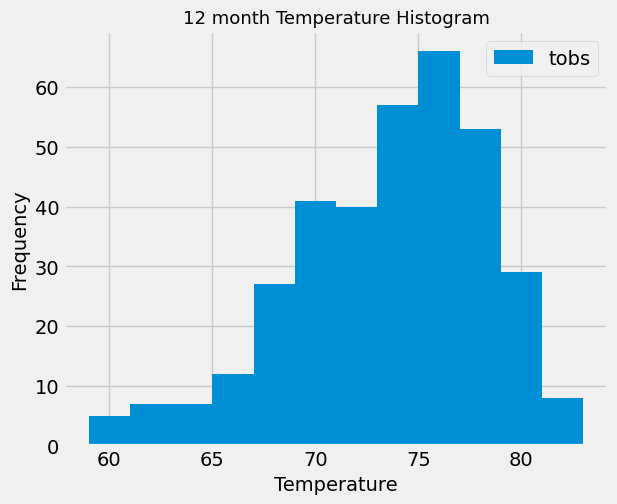

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [34]:
# Close Session
session.close()